/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_10169/1347482520.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)       # Fill missing Age with median
/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_10169/1347482520.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

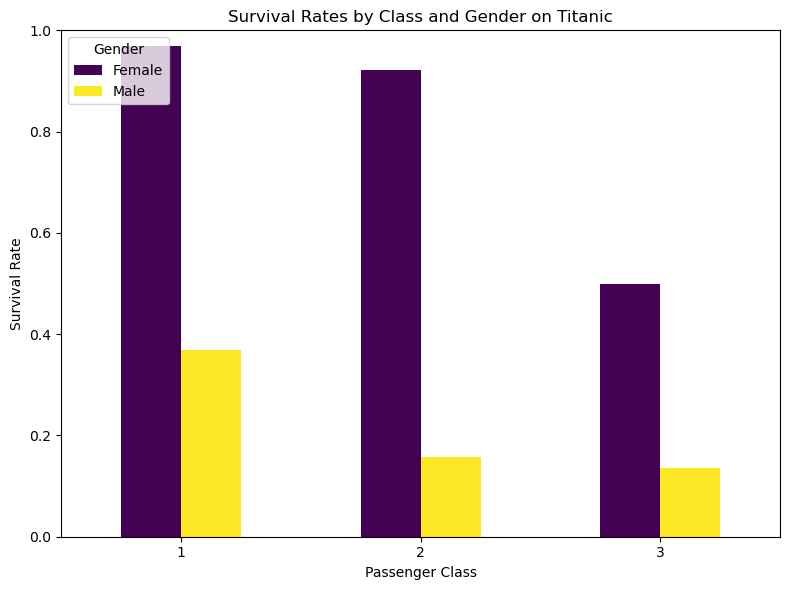

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'  
df = pd.read_csv(file_path)

# Preprocessing selected features
df['Age'].fillna(df['Age'].median(), inplace=True)       # Fill missing Age with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)     # Fill missing Fare with median
df['Cabin'].fillna('U', inplace=True)                    # Replace missing cabins with 'U'
df['Sex'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})  # Keep gender labels readable

# Group data by Gender and Class to calculate survival rates
survival_rates = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Plotting survival rates by class and gender
fig, ax = plt.subplots(figsize=(8, 6))

# Create grouped bar chart
survival_rates.plot(kind='bar', stacked=False, ax=ax, colormap='viridis')

# Adding labels and title
plt.title('Survival Rates by Class and Gender on Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper left')
plt.ylim(0, 1)  # Survival rates range from 0 to 1

# Display the graph
plt.tight_layout()
plt.show()


Class 2 Accuracy if you say every female survives, and every male dies

In [3]:
import pandas as pd

# Load the Titanic dataset
file_path = '/Users/rianarang/Desktop/Programming/syde543-titanic/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Preprocessing
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex' for clarity
class_2_data = df[df['Pclass'] == 2]                # Filter data for Class 2

# Apply the rule: Female -> Survived (1), Male -> Did not survive (0)
class_2_data['Predicted'] = class_2_data['Sex'].apply(lambda x: 1 if x == 1 else 0)

# Calculate accuracy
correct_predictions = (class_2_data['Predicted'] == class_2_data['Survived']).sum()
total_predictions = len(class_2_data)
accuracy = correct_predictions / total_predictions

print(f"Accuracy for Class 2 using the rule: {accuracy:.4f}")



Accuracy for Class 2 using the rule: 0.8750


/var/folders/6q/s52h6v_j21l4ggxw8g15mc5w0000gn/T/ipykernel_10169/1247714634.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_2_data['Predicted'] = class_2_data['Sex'].apply(lambda x: 1 if x == 1 else 0)


AGE AND FARE VISUALIZATION

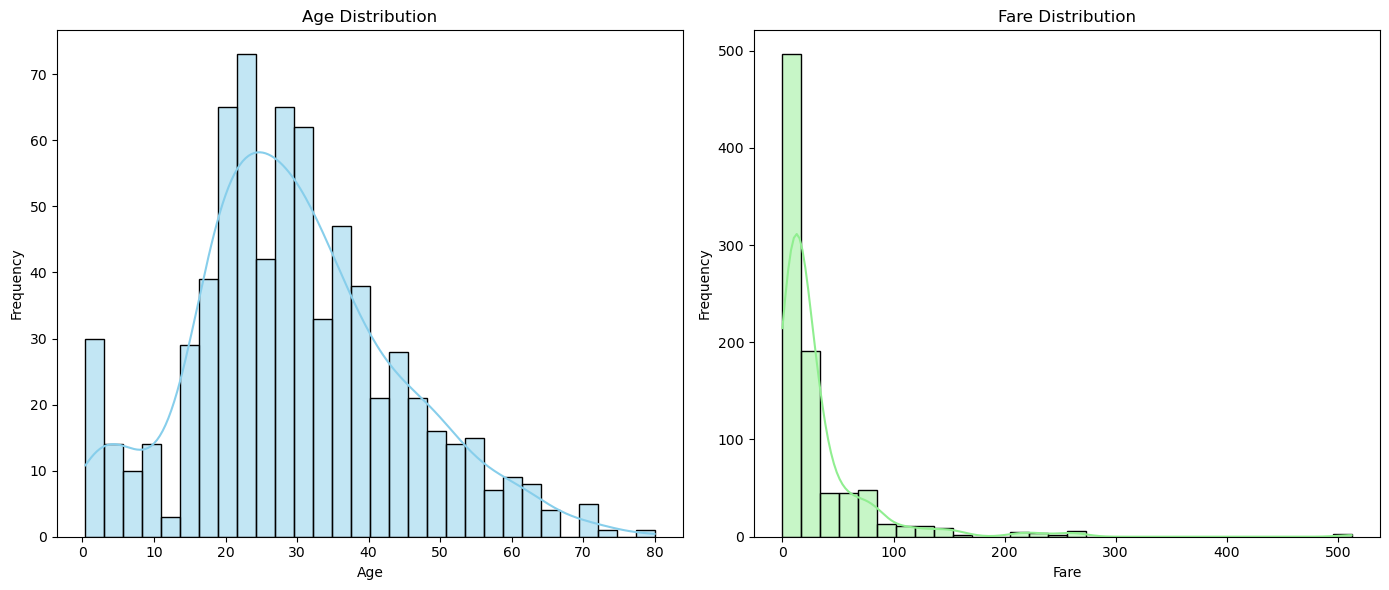

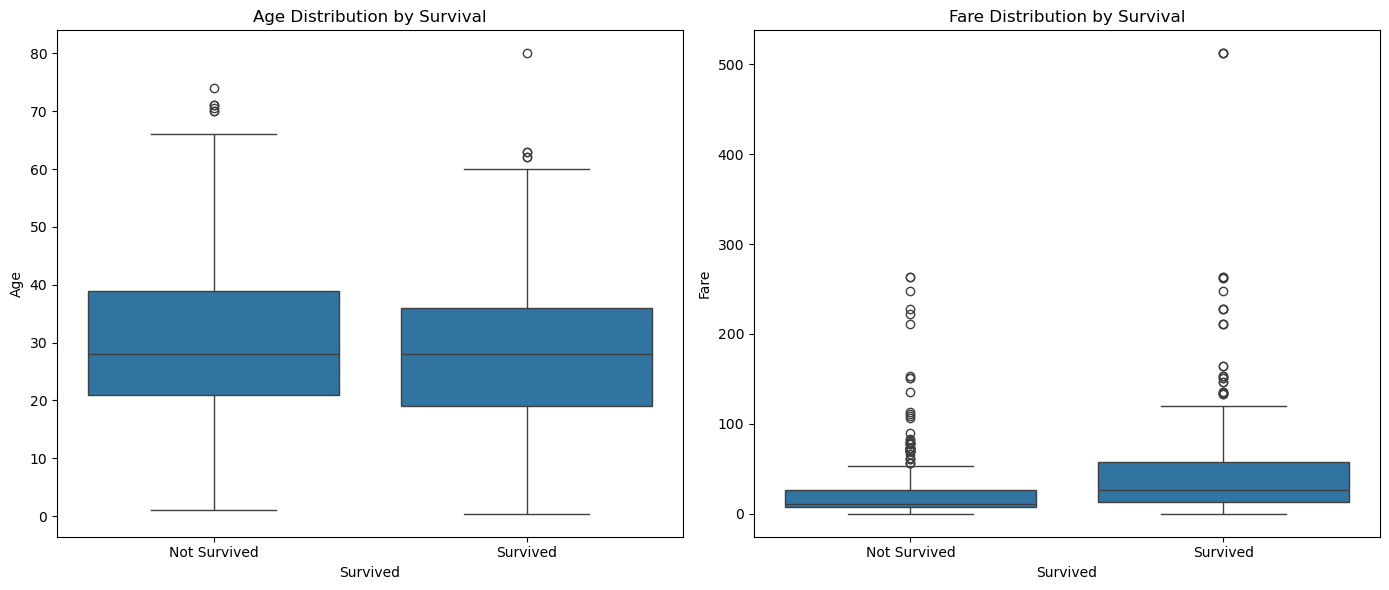

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Age and Fare distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Age Histogram
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Fare Histogram
sns.histplot(df['Fare'], bins=30, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title("Fare Distribution")
axes[1].set_xlabel("Fare")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Box Plots for Age and Fare by Survival
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Age Box Plot
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
axes[0].set_title("Age Distribution by Survival")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Survived', 'Survived'])

# Fare Box Plot
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[1].set_title("Fare Distribution by Survival")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()
